In [6]:
import pandas as pd
import ast
import os
from pprint import pprint
import matplotlib.pyplot as plt
from auxiliar_func import *

In [7]:
# show the best params for all the files in the /results folder
ignore_keys = ['random_seed', 'random_state', 'verbose', 'cat_features']
for file in os.listdir('./results'):
    if file.endswith('.csv') and file.startswith('results_'):
        print('='*20+file+'='*20)
        prep_p, mod_p = get_best_params('./results/'+file)
        for key in ignore_keys:
            if key in mod_p:
                mod_p.pop(key)
        pprint('Preprocessing best params:')
        pprint(prep_p)
        pprint('Model best params:')
        pprint(mod_p)

====================results_catboost.csv====================
'Preprocessing best params:'
{'cat_age': False,
 'downsampling_method': 'random',
 'generate_dummies': False,
 'imputation': 'mode',
 'merge_capital': False,
 'remove_duplicates': True,
 'scaling': None,
 'target_freq': 0.85}
'Model best params:'
{'border_count': 32,
 'class_weights': [1, 1],
 'depth': 6,
 'eval_metric': 'F1',
 'iterations': 750,
 'loss_function': 'Logloss'}
====================results_knn.csv====================
'Preprocessing best params:'
{'cat_age': True,
 'downsampling_method': 'random',
 'generate_dummies': True,
 'imputation': 'mode',
 'merge_capital': False,
 'remove_duplicates': True,
 'scaling': 'standard',
 'target_freq': 0.85}
'Model best params:'
{'n_neighbors': 15, 'weights': 'distance'}
====================results_lda.csv====================
'Preprocessing best params:'
{'cat_age': True,
 'downsampling_method': 'random',
 'generate_dummies': True,
 'imputation': 'mode',
 'merge_capital': False,

{'catboost': 0.7976616217772858,
 'knn': 0.7580555798828874,
 'lda': 0.7578632912005435,
 'logreg': 0.7749505241526554,
 'qda': 0.7401926203343498,
 'rf': 0.7806861921434933,
 'rf2': 0.7797270546295754,
 'rf3': 0.779617992880516,
 'svm': 0.7732645069011365}


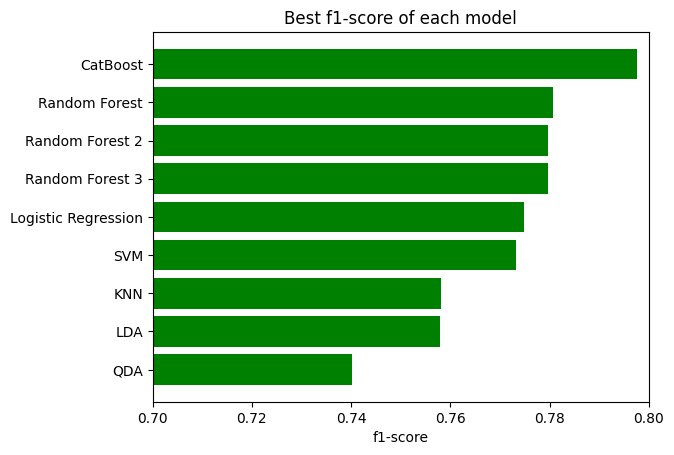

In [9]:
best_f1 = {}
for file in os.listdir('./results'):
    if file.endswith('.csv') and file.startswith('results_'):
        res = read_results('./results/'+file)
        best_f1[file.split('_')[1][:-4]] = res['f1_macro'].max()
    
pprint(best_f1)

model_names = {
    'knn': 'KNN',
    'svm': 'SVM',
    'rf': 'Random Forest',
    'rf2': 'Random Forest 2',
    'rf3': 'Random Forest 3',
    'logreg': 'Logistic Regression',
    'catboost': 'CatBoost',
    'lda': 'LDA',
    'qda': 'QDA',
}

best_f1 = {model_names[k]: v for k, v in sorted(best_f1.items(), key=lambda item: item[1])}
plt.barh(list(best_f1.keys()), list(best_f1.values()), color='green')
plt.xlim(0.7, 0.8)
plt.xlabel('f1-score')
plt.title('Best f1-score of each model')
plt.show()

In [ ]:
prep_p, mod_p = get_best_params('./results/results_catboost.csv')
mod_p['cat_features'] = ''
pprint(prep_p)
pprint(mod_p)

{'cat_age': False,
 'downsampling_method': 'random',
 'generate_dummies': False,
 'imputation': 'mode',
 'merge_capital': False,
 'remove_duplicates': True,
 'scaling': None,
 'target_freq': 0.85}
{'border_count': 32,
 'cat_features': '',
 'class_weights': [1, 1],
 'depth': 6,
 'eval_metric': 'F1',
 'iterations': 750,
 'loss_function': 'Logloss',
 'random_seed': 42,
 'verbose': 0}


In [ ]:
df = pd.read_csv('./results/results_catboost.csv')
for obj_col in ['prep_param', 'model_param']:
    df[obj_col] = df[obj_col].apply(lambda x: ast.literal_eval(x))
df.sort_values(by=['f1_macro'], inplace=True, ascending=False)
df.drop_duplicates(subset=['f1_macro'], inplace=True)
df_exp = expand_dicts(df)
df_exp.head()

,accuracy,f1_macro,precision_macro,recall_macro,tex,scaling,imputation,cat_age,merge_capital,downsampling_method,...,remove_duplicates,iterations,depth,border_count,random_seed,verbose,loss_function,eval_metric,class_weights,cat_features
0,0.952802,0.797662,0.801389,0.794142,275.496793,None,mode,False,False,random,...,True,750,6,32,42,0,Logloss,F1,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
1,0.953138,0.796922,0.804067,0.790271,181.339746,None,mode,False,False,random,...,True,750,4,96,42,0,Logloss,F1,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
2,0.953224,0.796888,0.804704,0.789666,181.043571,None,mode,False,False,random,...,True,750,4,96,42,0,Logloss,AUC,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
3,0.952888,0.795990,0.803046,0.789549,178.471049,None,mode,False,False,random,...,True,750,4,64,42,0,Logloss,F1,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
4,0.952730,0.795402,0.802126,0.789145,174.454477,None,mode,False,False,random,...,True,750,4,32,42,0,Logloss,AUC,"[1, 1]","[class_worker, det_ind_code, det_occ_code, edu..."
